## import all libraries 

In this notebook, I will import all the libraries that will be used in this project.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import os
from ucimlrepo import fetch_ucirepo, list_available_datasets



# import the Heart Disease Dataset 
Loads a dataset from the UCI ML Repository, including the dataframes and metadata information.



In [3]:
# load all the datasets
list_available_datasets()


-------------------------------------
The following datasets are available:
-------------------------------------
Dataset Name                                                                            ID    
------------                                                                            --    
Abalone                                                                                 1     
Adult                                                                                   2     
Annealing                                                                               3     
Audiology (Standardized)                                                                8     
Auto MPG                                                                                9     
Automobile                                                                              10    
Balance Scale                                                                           12    
Balloons                       

## import dataset

The dateset can be imported using the id of the dataset which in this case is 45 or it can be imported using the name of the dataset ("heart disease")


In [4]:
# import the data using the UCI Repo API
heart_disease = fetch_ucirepo(id=45)


In [5]:
heart_disease

{'data': {'ids': None,
  'features':      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
  0     63    1   1       145   233    1        2      150      0      2.3   
  1     67    1   4       160   286    0        2      108      1      1.5   
  2     67    1   4       120   229    0        2      129      1      2.6   
  3     37    1   3       130   250    0        0      187      0      3.5   
  4     41    0   2       130   204    0        2      172      0      1.4   
  ..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
  298   45    1   1       110   264    0        0      132      0      1.2   
  299   68    1   4       144   193    1        0      141      0      3.4   
  300   57    1   4       130   131    0        0      115      1      1.2   
  301   57    0   2       130   236    0        2      174      0      0.0   
  302   38    1   3       138   175    0        0      173      0      0.0   
  
       slope   ca  thal  


### Exploratory Data Analysis

In this section, I will perform exploratory data analysis to understand the data and identify any missing values or outliers.

In [6]:
# check the shape of the dataframe
heart_disease['data']['features'].shape

(303, 13)

In [31]:
# access data
X = heart_disease.data.features
y = heart_disease.data.targets


,num
0,0
1,2
2,1
3,0
4,0


In [10]:
# combine the data into a dataframe
heart_disease_df = pd.concat([X, y], axis=1)
heart_disease_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [11]:
# check the shape of the dataframe
heart_disease_df.shape

(303, 14)

In [12]:
# get a summary of the dataframe
heart_disease_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


In [13]:
# get a summary of the dataframe
heart_disease_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [14]:
# check for all missing values
heart_disease_df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

In [15]:
# fill in the missing values with the mean 
heart_disease_df.fillna(heart_disease_df.mean(), inplace=True)

In [16]:
# check for all missing values
heart_disease_df.isna().sum()


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

#  Check value counts for all categorical variables


In [18]:
#  Check value counts for a  all categorical columns
categorical_columns = heart_disease_df.select_dtypes(include=['object']).columns
heart_disease_df[categorical_columns].nunique()

#  Check value counts for a  specific categorical column
heart_disease_df['num'].value_counts()

num
0    164
1     55
2     36
3     35
4     13
Name: count, dtype: int64

In [19]:
heart_disease_df['sex'].value_counts()

sex
1    206
0     97
Name: count, dtype: int64

### Data distribution and data anomalys

In this section, I will perform data distribution and data anomalies.

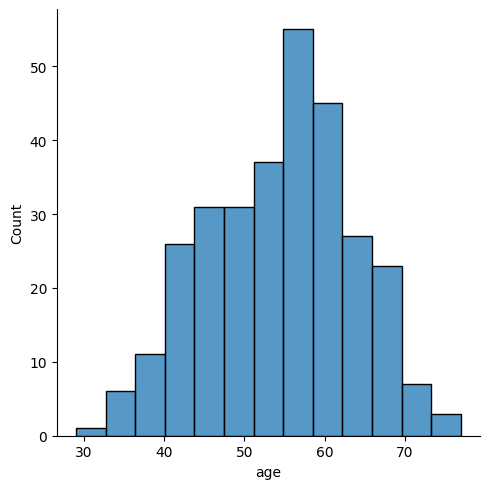

In [20]:
# plot the histogram to see the distribution of age .
sns.displot(heart_disease_df, x="age")


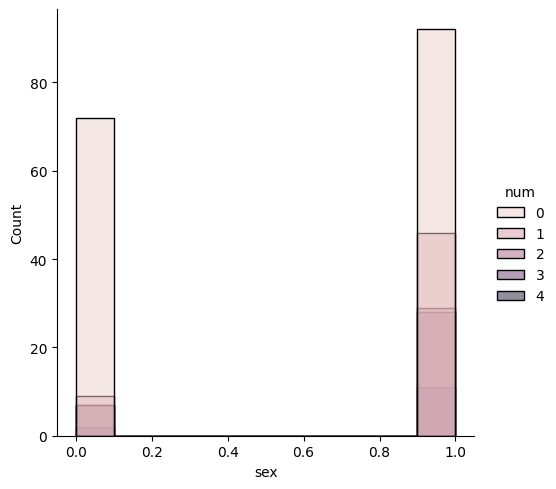

In [29]:
# check for the distribution of heart disease regarding sex 
sns.displot(heart_disease_df, x="sex", hue="num")

### measure its skewness and kurtosis

In this section, I will measure its skewness and kurtosis of the age column in the Dataset. 

In [21]:
heart_disease_df['age'].agg(['skew', 'kurtosis']).transpose()

skew       -0.209060
kurtosis   -0.523383
Name: age, dtype: float64

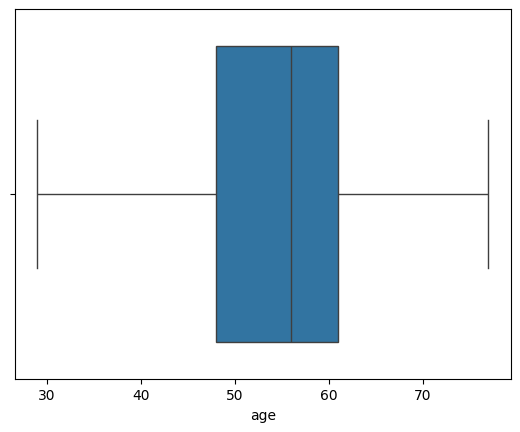

In [22]:
ax = sns.boxplot(x=heart_disease_df["age"])


###  Correlation between variables in the data

In this section, I will perform correlation between variables in the Dataset. Cheecking the correlation between the variables is necessary to see potential a feature that we can use for further analysis or building a model later. We can use a correlation matrix to get this.

In [23]:
corrMatrix = heart_disease_df.corr()


<Axes: >

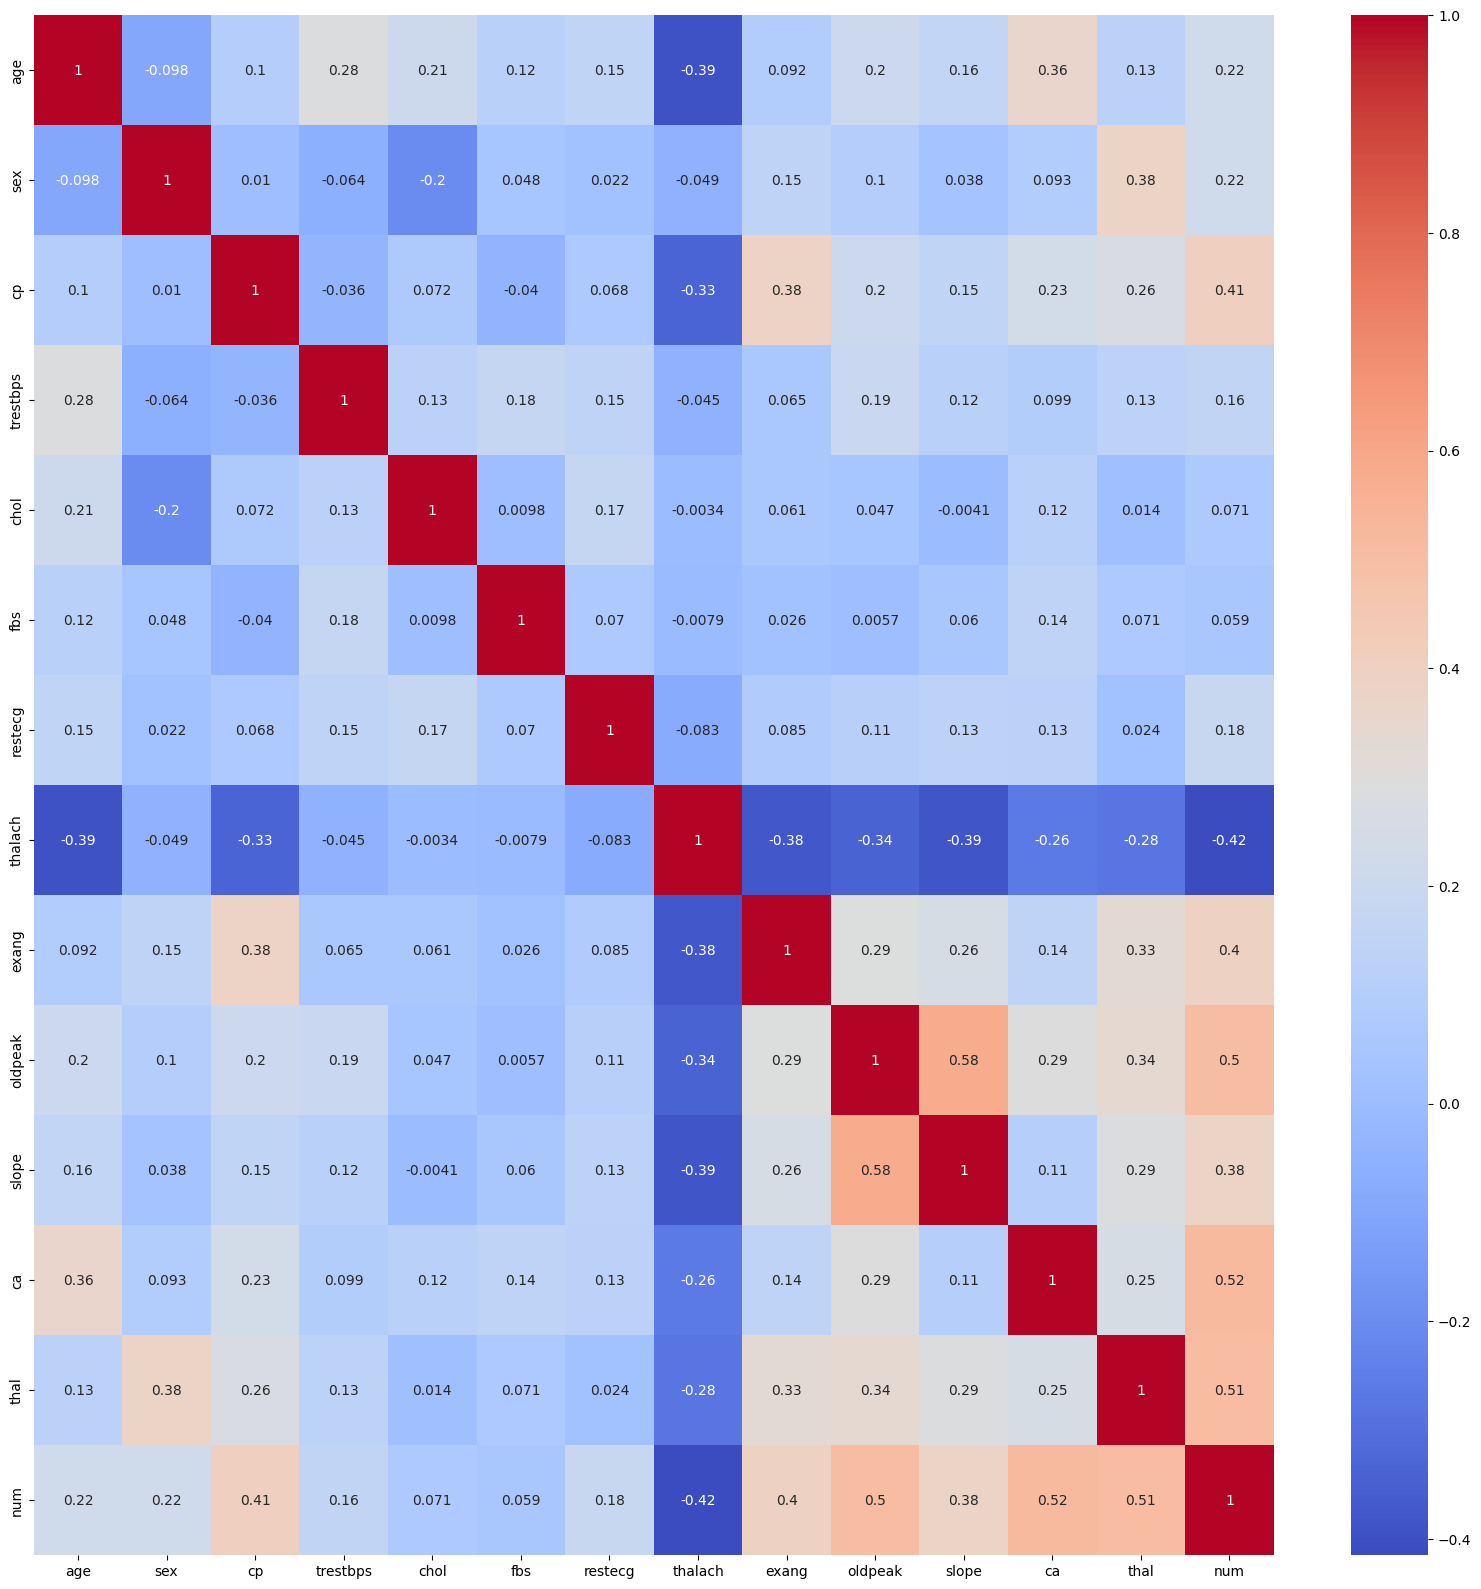

In [26]:
# Next, we visualise the matrix with Seaborn library

# increase the size of the plot 
plt.figure(figsize=(20, 20))
# plot the heatmap
sns.heatmap(corrMatrix, annot=True, cmap= 'coolwarm')



From the heatmap, we can see that there are strong positive correlations between the variables such as 'cp' (chest pain type), 'thal' (maximum heart rate achieved), 'exang' (exercise induced angina), and 'oldpeak' (ST depression induced by exercise relative to rest).


<Axes: >

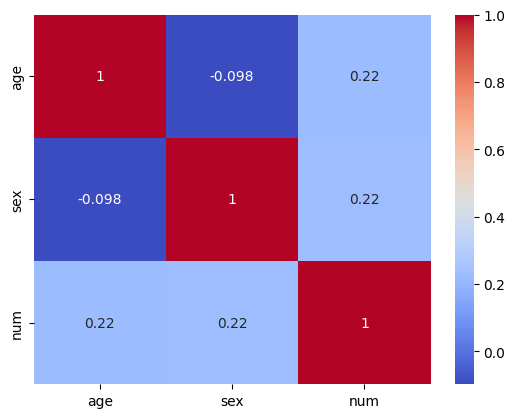

In [28]:
# plot the correlation matrix of age, sex and num 

corrMatrix = heart_disease_df[['age', 'sex', 'num']].corr()
sns.heatmap(corrMatrix, annot=True, cmap= 'coolwarm')

### Save the Dataset to CSV

In this section, I will save the Dataset to CSV.

In [32]:
# Save the data to a CSV file
heart_disease_df.to_csv('../data/heart_disease_preprocessed.csv', index=False)